# LIDARカメラから距離マップをリアルタイム取得する

In [1]:
from uikit.ui_uiview import *
# ビデオ画像のリアルタイム取得を行うためのモジュール
from avfoundation.video_capture_ex import *
import time

# 画面サイズを取得する
size = get_screen_bounds().size
# プレビュー表示用のUIViewを作成する
ui_view = create_uiview(
    rect=CGRect( CGPoint(size.width/4/2, size.height/4/2),
                 CGSize(3*size.width/4,  3*size.height/4) ),
    name='sample',
    color=UIColor.color(red=0,green=0,blue=0,alpha=1) )

In [2]:
import copy

# 色画像・距離画像を入れるリストを用意
video_and_depths = []

# numpyアレイとしてカメラ画像が渡されると
# リストに追加する
def process_image( video_and_depth ): 
    video_and_depths.append( copy.copy(video_and_depth) )

In [3]:
AVCaptureVideoCaptureEx_ = AVCaptureVideoCaptureEx(
        AVCaptureDeviceTypeBuiltInLiDARDepthCamera, # 取得デバイス
        AVCaptureDevicePositionBack,                 # カメラ位置
        'AVCaptureSessionPreset640x480',             # 取得画像サイズ
        CV32BGRA,                                    # 画像色フォーマット
        process_image,           # 取得画像を使った処理を行うユーザ関数
        None,                   # UIViewへの表示画像を生成するユーザ関数
        ui_view )               # 取得画像を表示するUIView

# 撮影開始
AVCaptureVideoCaptureEx_.video_shooting_start(0.1) # 撮影インターバルを秒で指定
time.sleep(2) # 2秒間にわたり撮影を行う
# 撮影を終了する
AVCaptureVideoCaptureEx_.video_shooting_close(ui_view)

processed_frames:19


In [4]:


print(video_and_depths[0]['video'].shape)
print(video_and_depths[0]['depth'].shape)

l = len(video_and_depths)         # 取得した画像の枚数
print("{:d} images are captured.".format(l))

video_h, video_w = video_and_depths[0]['video'].shape  # 取得した画像の縦・横サイズ
print("image: height:{:d} pixels x width:{:d} pixels".format(video_h, video_w))

depth_h, depth_w = video_and_depths[0]['depth'].shape  # 取得した画像の縦・横サイズ
print("depth: height:{:d} pixels x width:{:d} pixels".format(depth_h, depth_w))

(480, 2560)
(240, 320)
13 images are captured.
image: height:480 pixels x width:2560 pixels
depth: height:240 pixels x width:320 pixels


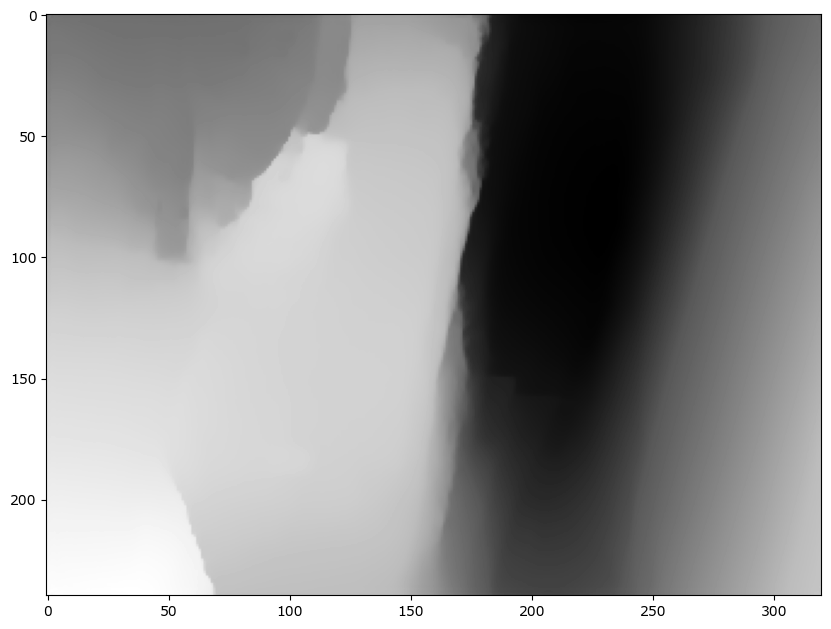

In [6]:
# matplotlibを使って画像を表示する
from matplotlib import pylab as plt
import cv2

# 画像を表示する
plt.figure(figsize=[6,6])
#plt.imshow(video_and_depths[-1]['depth'].reshape(depth_h, depth_w))

depth_image = np.rot90(video_and_depths[0]['depth'],-1)
plt.imshow(depth_image, cmap='gray')

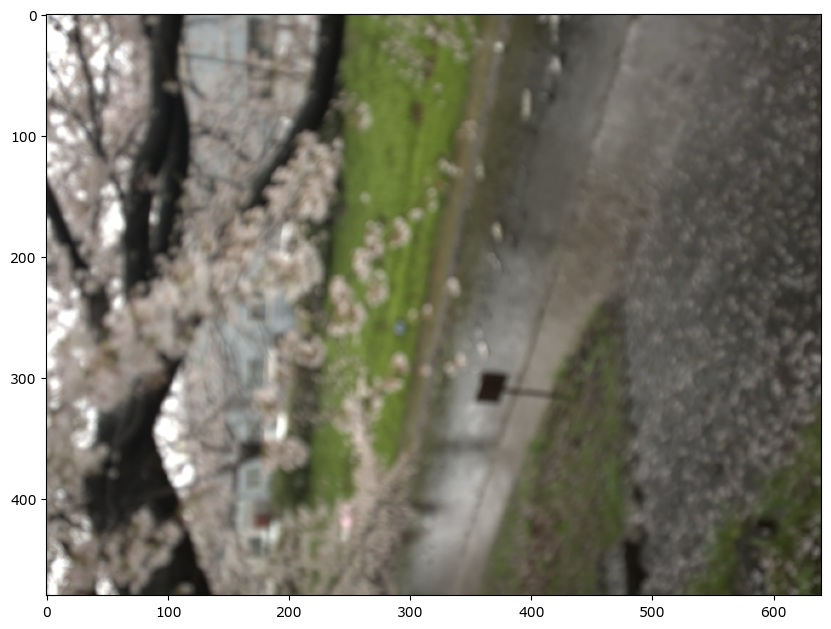

In [7]:
# matplotlibを使って画像を表示する
from matplotlib import pylab as plt
import cv2

plt.figure(figsize=[6,6])
rgba_image = cv2.cvtColor( 
    video_and_depths[0]['video'].reshape(video_h, int(video_w/4), 4), 
    cv2.COLOR_RGBA2BGRA)
plt.imshow(rgba_image)


(256, 256, 3)
(256, 256)


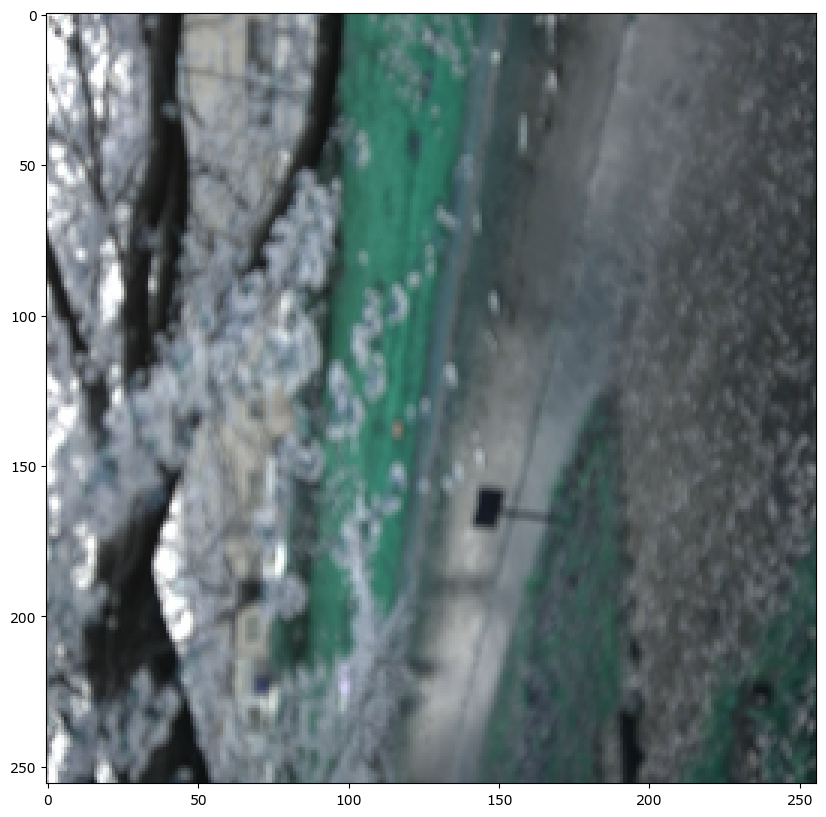

In [8]:
# 散布図を描く例

l=256
size=(l,l)

# テクスチャ画像
rgb_image = video_and_depths[0]['video'].reshape(video_h, int(video_w/4), 4)
tex = cv2.resize(rgb_image/255, size)[:,:,:3]
print(tex.shape)

# 高さ画像
z = depth_image/255
z = cv2.resize(z, size)
print(z.shape)

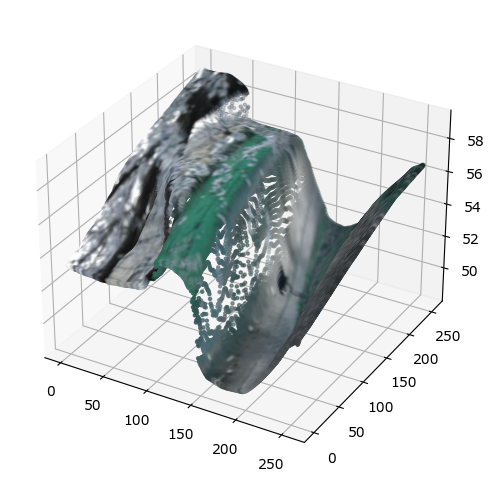

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from itertools import chain
#%matplotlib notebook

x = y = np.linspace(0, l, l)
x, y = np.meshgrid(x, y)

fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(np.ravel(x), np.ravel(y), np.ravel(z), 
             marker='.',c=np.reshape(tex,(l*l,3))) 
#ax.invert_zaxis()
plt.show()